## ESG 데이터와 자산규모/실적 성장의 상관관계

1. 향후 3년 자산규모/실적 성장률 계산
2. E/S/G 각 팩터에 노출도가 높은 섹터별 분해
3. 각 유니버스에서 ESG 팩터와 성장률 사이 상관관계 계산

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore

In [14]:
df = pd.read_csv('ESG_Growth_Analysis.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445298 entries, 0 to 445297
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    445298 non-null  object 
 1   Company Name  445298 non-null  object 
 2   Periods       445298 non-null  object 
 3   Ticker        444937 non-null  object 
 4   Region        445298 non-null  object 
 5   Country       445298 non-null  object 
 6   Sector        445281 non-null  object 
 7   Industry      445281 non-null  object 
 8   MSCI Rating   379609 non-null  object 
 9   MSCI E        379501 non-null  float64
 10  MSCI S        379609 non-null  float64
 11  MSCI G        379443 non-null  float64
 12  EPS           443420 non-null  float64
 13  Net Income    443513 non-null  float64
 14  Asset         443479 non-null  float64
dtypes: float64(6), object(9)
memory usage: 51.0+ MB


In [15]:
df

,Unnamed: 0,Company Name,Periods,Ticker,Region,Country,Sector,Industry,MSCI Rating,MSCI E,MSCI S,MSCI G,EPS,Net Income,Asset
0,312,Aberdeen Asset Management PLC,6/29/2012,ADN-GB,Europe,United Kingdom,Financials,Capital Markets,A,4.22,7.24,5.05,0.08,147.08,4910.05
1,312,Aberdeen Asset Management PLC,7/31/2012,ADN-GB,Europe,United Kingdom,Financials,Capital Markets,AA,7.20,5.90,5.80,0.08,147.08,4910.05
2,312,Aberdeen Asset Management PLC,8/31/2012,ADN-GB,Europe,United Kingdom,Financials,Capital Markets,AA,7.20,5.90,5.80,0.08,147.08,4910.05
3,312,Aberdeen Asset Management PLC,9/28/2012,ADN-GB,Europe,United Kingdom,Financials,Capital Markets,AA,7.20,5.90,5.80,0.08,147.08,4910.05
4,312,Aberdeen Asset Management PLC,10/31/2012,ADN-GB,Europe,United Kingdom,Financials,Capital Markets,AA,7.20,5.90,5.80,0.08,147.08,4910.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445293,Y2573F10,Flex Ltd.,1/31/2020,FLEX-US,North America,United States,Information Technology,Electronic Equipment Instruments & Components,A,4.20,4.30,7.20,-0.23,-116.94,14276.65
445294,Y2573F10,Flex Ltd.,2/28/2020,FLEX-US,North America,United States,Information Technology,Electronic Equipment Instruments & Components,A,4.30,4.50,7.20,-0.23,-116.94,14276.65
445295,Y2573F10,Flex Ltd.,3/31/2020,FLEX-US,North America,United States,Information Technology,Electronic Equipment Instruments & Components,A,4.30,4.50,6.60,0.22,111.39,14135.42
445296,Y2573F10,Flex Ltd.,4/30/2020,FLEX-US,North America,United States,Information Technology,Electronic Equipment Instruments & Components,A,4.30,4.50,6.60,0.22,111.39,14135.42


In [16]:
df['Periods'] = pd.to_datetime(df['Periods'], format='%m/%d/%Y')
df = df.sort_values(by=['Periods'], ascending=False)
df['Periods'].unique()

array(['2022-04-29T00:00:00.000000000', '2022-03-31T00:00:00.000000000',
       '2022-02-28T00:00:00.000000000', '2022-01-31T00:00:00.000000000',
       '2021-12-31T00:00:00.000000000', '2021-11-30T00:00:00.000000000',
       '2021-10-29T00:00:00.000000000', '2021-09-30T00:00:00.000000000',
       '2021-08-31T00:00:00.000000000', '2021-07-30T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000', '2021-05-31T00:00:00.000000000',
       '2021-04-30T00:00:00.000000000', '2021-03-31T00:00:00.000000000',
       '2021-02-26T00:00:00.000000000', '2021-01-29T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2020-11-30T00:00:00.000000000',
       '2020-10-30T00:00:00.000000000', '2020-09-30T00:00:00.000000000',
       '2020-08-31T00:00:00.000000000', '2020-07-31T00:00:00.000000000',
       '2020-06-30T00:00:00.000000000', '2020-05-29T00:00:00.000000000',
       '2020-04-30T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-02-28T00:00:00.000000000', '2020-01-31

In [17]:
df = df.dropna(subset = ['Ticker'])

In [18]:
# 향후 3년 실적 성장률 계산

df = df.sort_values(['Ticker', 'Periods']).reset_index(drop=True)

def gr_3y(data):
    return data.shift(-36)/ data - 1

In [19]:
df['EPS_gr'] = df.groupby(['Ticker'])['EPS'].apply(lambda x: gr_3y(x))
df

,Unnamed: 0,Company Name,Periods,Ticker,Region,Country,Sector,Industry,MSCI Rating,MSCI E,MSCI S,MSCI G,EPS,Net Income,Asset,EPS_gr
0,B0YCFG,"Meritz Fire & Marine Insurance Co., Ltd",2022-03-31,000060-KR,Asia/Pacific Ex Japan,Korea,Financials,Insurance,CCC,0.4,3.2,3.9,1792.68,163.60,22903.61,NaN
1,B0YCFG,"Meritz Fire & Marine Insurance Co., Ltd",2022-04-29,000060-KR,Asia/Pacific Ex Japan,Korea,Financials,Insurance,CCC,0.4,3.2,3.9,1792.68,163.60,22903.61,NaN
2,B05R49,HITEJINRO CO LTD,2013-06-28,000080-KR,Asia/Pacific Ex Japan,Korea,Consumer Staples,Beverages,NaN,NaN,NaN,NaN,259.42,16.14,3175.35,NaN
3,B05R49,HITEJINRO CO LTD,2013-07-31,000080-KR,Asia/Pacific Ex Japan,Korea,Consumer Staples,Beverages,NaN,NaN,NaN,NaN,259.42,16.14,3175.35,NaN
4,B05R49,HITEJINRO CO LTD,2013-08-30,000080-KR,Asia/Pacific Ex Japan,Korea,Consumer Staples,Beverages,B,1.1,3.3,7.0,259.42,16.14,3175.35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444932,598381,Zurich Insurance Group Ltd,2021-12-31,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,6.5,6.2,6.6,13.39,2193.00,417626.99,NaN
444933,598381,Zurich Insurance Group Ltd,2022-01-31,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,6.5,6.2,6.6,13.39,2193.00,417626.99,NaN
444934,598381,Zurich Insurance Group Ltd,2022-02-28,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,6.5,6.2,6.6,13.39,2193.00,417626.99,NaN
444935,598381,Zurich Insurance Group Ltd,2022-03-31,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,6.3,6.1,6.6,18.67,3009.00,410146.01,NaN


In [20]:
df.replace([np.inf, -np.inf], np.nan, inplace = True) # infinite을 NaN으로 치환
df = df.dropna(subset = ['MSCI Rating', 'MSCI E', 'EPS_gr']) # NaN 행 제거
df

,Unnamed: 0,Company Name,Periods,Ticker,Region,Country,Sector,Industry,MSCI Rating,MSCI E,MSCI S,MSCI G,EPS,Net Income,Asset,EPS_gr
93,698833,Yuhan Corporation,2013-01-31,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,4.9,1.7,171.78,10.57,1175.49,2.799278
94,698833,Yuhan Corporation,2013-02-28,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,4.9,1.7,171.78,10.57,1175.49,2.799278
95,698833,Yuhan Corporation,2013-03-29,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,4.9,1.7,171.78,10.57,1175.49,1.164163
96,698833,Yuhan Corporation,2013-04-30,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,4.9,1.7,398.63,25.71,1256.21,-0.067406
97,698833,Yuhan Corporation,2013-05-31,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,4.9,1.7,398.63,25.71,1256.21,-0.067406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444896,598381,Zurich Insurance Group Ltd,2018-12-31,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,7.0,6.3,7.7,11.53,1791.00,389468.99,0.161318
444897,598381,Zurich Insurance Group Ltd,2019-01-31,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,7.0,6.3,7.7,11.53,1791.00,389468.99,0.161318
444898,598381,Zurich Insurance Group Ltd,2019-02-28,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,7.0,6.3,7.7,11.53,1791.00,389468.99,0.161318
444899,598381,Zurich Insurance Group Ltd,2019-03-29,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,7.0,6.3,7.7,11.53,1791.00,389468.99,0.619254


In [21]:
df_EPS_gr_by_Rating = df.groupby(['Periods', 'MSCI Rating']).mean().reset_index()
df_EPS_gr_by_Rating

,Periods,MSCI Rating,MSCI E,MSCI S,MSCI G,EPS,Net Income,Asset,EPS_gr
0,2007-01-31,A,5.492157,6.259085,6.120000,60.224575,522.566732,102539.137386,-0.460456
1,2007-01-31,AA,6.487338,6.924460,6.659281,376.559568,766.738921,136347.323022,-0.365473
2,2007-01-31,AAA,7.060609,7.858348,7.691739,9.120261,729.908522,95120.886348,-0.476991
3,2007-01-31,B,3.677500,4.226618,4.176471,147.313382,267.069853,30148.757059,-0.475925
4,2007-01-31,BB,4.472902,4.958795,4.744420,37.754955,297.013170,43215.751295,-0.109383
...,...,...,...,...,...,...,...,...,...
1031,2019-04-30,AAA,7.167826,6.443478,6.723478,3.517913,553.533304,70635.281391,0.132841
1032,2019-04-30,B,4.168182,3.509917,3.975207,36.570331,237.331198,38158.625041,0.146483
1033,2019-04-30,BB,4.867296,4.014465,4.603145,81.749308,398.676151,142494.506088,0.706897
1034,2019-04-30,BBB,5.286574,4.719676,4.958565,34.290579,355.449769,72616.602477,0.904858


<AxesSubplot:xlabel='Periods'>

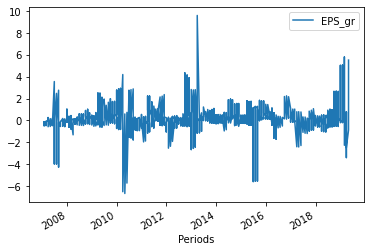

In [22]:
df_EPS_gr_by_Rating.plot(kind='line', x='Periods', y='EPS_gr')

In [23]:
df_count = df[(df['Periods'] == "2007-01-31") & (df['MSCI Rating'] == "A")]
df_count['EPS_gr'].unique() # infinite value 발견 -> 아래 피벗 평균계산에서 NaN이 발생한 이유.

array([-2.46685649e-01, -2.80000000e+00, -2.53846154e+00, -5.33333333e-02,
       -7.44346712e-01, -3.50311262e-01,  1.02306425e+00, -4.03225806e-02,
        1.65775401e-01, -5.52746882e-02,  1.94426442e-02, -4.39153439e-01,
       -1.84980494e-01,  7.68316832e-01,  3.85623229e-01,  1.93446089e-01,
        5.03243744e-01, -1.59947644e+00,  4.14795918e+00, -6.17114304e-01,
       -8.43053817e-01, -1.91054545e+00, -6.46356877e+00, -1.24391075e+00,
       -9.88254354e-01, -6.92307692e-01, -4.64443138e-01,  2.74857143e+00,
       -7.00729927e-01, -9.48541617e-03,  4.65517241e-01, -3.03571429e-01,
        2.42424242e-01, -1.41176471e-01, -8.50000000e-01,  2.62135922e-01,
       -9.78881988e-01, -5.60000000e-01,  6.83673469e-01, -1.80000000e+00,
       -2.51908397e-01, -6.66666667e-01,  4.46808511e-01,  1.86046512e-01,
        0.00000000e+00,  6.48148148e-01, -5.15151515e-01,  5.00000000e-01,
       -2.95454545e-01,  3.43750000e-01, -8.34862385e-01,  7.85714286e-01,
       -1.82481752e-01, -

In [24]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 4762 to 444253
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    153 non-null    object        
 1   Company Name  153 non-null    object        
 2   Periods       153 non-null    datetime64[ns]
 3   Ticker        153 non-null    object        
 4   Region        153 non-null    object        
 5   Country       153 non-null    object        
 6   Sector        153 non-null    object        
 7   Industry      153 non-null    object        
 8   MSCI Rating   153 non-null    object        
 9   MSCI E        153 non-null    float64       
 10  MSCI S        153 non-null    float64       
 11  MSCI G        153 non-null    float64       
 12  EPS           153 non-null    float64       
 13  Net Income    153 non-null    float64       
 14  Asset         153 non-null    float64       
 15  EPS_gr        153 non-null    floa

In [25]:
df_EPS_gr_by_Rating_pivot = pd.pivot_table(df, index=['Periods'], columns=['MSCI Rating'], values=['EPS_gr'], aggfunc='mean')
df_EPS_gr_by_Rating_pivot

EPS_gr                                                    \
MSCI Rating         A        AA       AAA         B        BB       BBB   
Periods                                                                   
2007-01-31  -0.460456 -0.365473 -0.476991 -0.475925 -0.109383 -0.111773   
2007-02-28  -0.459088 -0.362943 -0.462017 -0.395576 -0.086442 -0.078888   
2007-03-30   0.048161 -0.203442 -0.396165 -0.237204  0.264014  0.061985   
2007-04-30   0.165968 -0.189551 -0.381527 -0.069538  0.137470 -0.438122   
2007-05-31   0.194371 -0.241793 -0.341208 -0.064639 -0.086846 -0.039909   
...               ...       ...       ...       ...       ...       ...   
2018-12-31  -0.043494  0.151554  0.024891  5.039832  1.229436  0.394617   
2019-01-31   0.030026  0.124198 -0.009613  5.066476  1.062306  0.387977   
2019-02-28   0.042635  0.136879 -0.004839  5.802163  1.018259  0.378444   
2019-03-29   0.762770 -3.396677  0.374484 -0.202926  0.783717  0.464779   
2019-04-30  -0.879771  0.412942  0.132841  0.146483  0.706897  0.904858   

                       
MSCI Rating       CCC  
Periods                
2007-01-31  -0.119575  
2007-02-28  -0.148911  
2007-03-30  -0.575049  
2007-04-30  -0.550364  
2007-05-31  -0.484898  
...               ...  
2018-12-31  -0.209347  
2019-01-31  -0.209347  
2019-02-28  -2.270942  
2019-03-29  -2.494483  
2019-04-30   5.520725  

[148 rows x 7 columns]

In [26]:
df_EPS_gr_by_Rating_pivot_c = pd.pivot_table(df, index=['Periods'], columns=['MSCI Rating'], values=['EPS_gr'], aggfunc='count')
df_EPS_gr_by_Rating_pivot_c

EPS_gr                              
MSCI Rating      A   AA  AAA    B   BB  BBB  CCC
Periods                                         
2007-01-31     153  139  115  136  224  210   91
2007-02-28     177  160  129  151  235  228   99
2007-03-30     175  167  132  164  230  240  107
2007-04-30     185  165  139  163  239  244  109
2007-05-31     184  168  137  163  236  242  108
...            ...  ...  ...  ...  ...  ...  ...
2018-12-31     391  268  117  250  325  430   78
2019-01-31     390  268  117  248  325  428   78
2019-02-28     388  272  116  249  326  432   81
2019-03-29     390  269  116  241  319  434   83
2019-04-30     390  271  115  242  318  432   84

[148 rows x 7 columns]

<AxesSubplot:xlabel='Periods'>

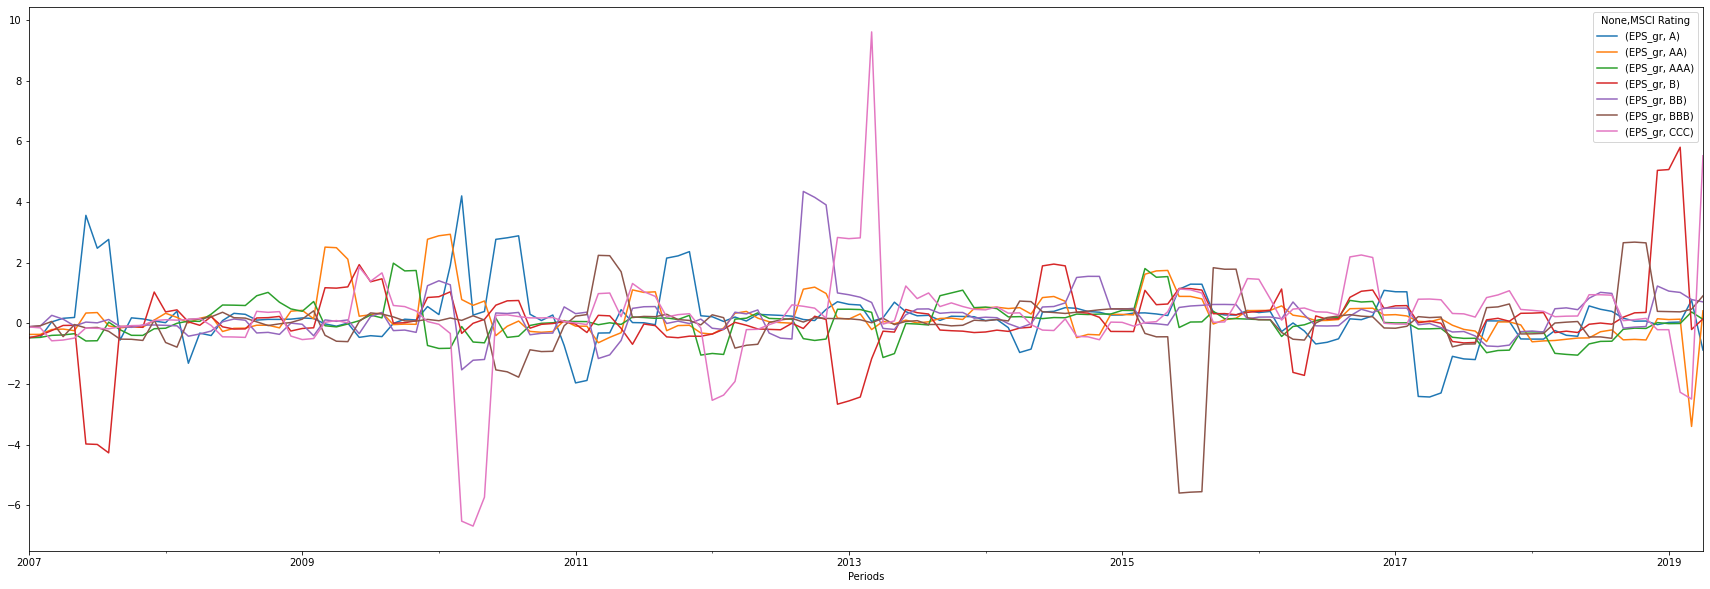

In [27]:
df_EPS_gr_by_Rating_pivot.plot(kind = 'line', figsize = (30,10))

In [28]:
df['yyyy'] = pd.to_datetime(df['Periods']).dt.year

yr = 2013
df_yr = df[df['yyyy'] == yr]
df_yr

C:\Users\jchoi02\AppData\Local\Temp/ipykernel_20100/57390450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yyyy'] = pd.to_datetime(df['Periods']).dt.year


,Unnamed: 0,Company Name,Periods,Ticker,Region,Country,Sector,Industry,MSCI Rating,MSCI E,MSCI S,MSCI G,EPS,Net Income,Asset,EPS_gr,yyyy
93,698833,Yuhan Corporation,2013-01-31,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,4.9,1.7,171.78,10.57,1175.49,2.799278,2013
94,698833,Yuhan Corporation,2013-02-28,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,4.9,1.7,171.78,10.57,1175.49,2.799278,2013
95,698833,Yuhan Corporation,2013-03-29,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,4.9,1.7,171.78,10.57,1175.49,1.164163,2013
96,698833,Yuhan Corporation,2013-04-30,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,4.9,1.7,398.63,25.71,1256.21,-0.067406,2013
97,698833,Yuhan Corporation,2013-05-31,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,4.9,1.7,398.63,25.71,1256.21,-0.067406,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444832,598381,Zurich Insurance Group Ltd,2013-08-30,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,9.5,5.5,6.1,6.72,1062.00,387752.46,-0.133929,2013
444833,598381,Zurich Insurance Group Ltd,2013-09-30,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,9.5,5.5,6.1,5.04,789.00,379250.00,-0.047619,2013
444834,598381,Zurich Insurance Group Ltd,2013-10-31,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,9.5,5.5,6.1,5.04,789.00,379250.00,-0.047619,2013
444835,598381,Zurich Insurance Group Ltd,2013-11-29,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,9.5,5.5,6.1,5.04,789.00,379250.00,-0.047619,2013


<AxesSubplot:xlabel='MSCI E', ylabel='EPS_gr'>

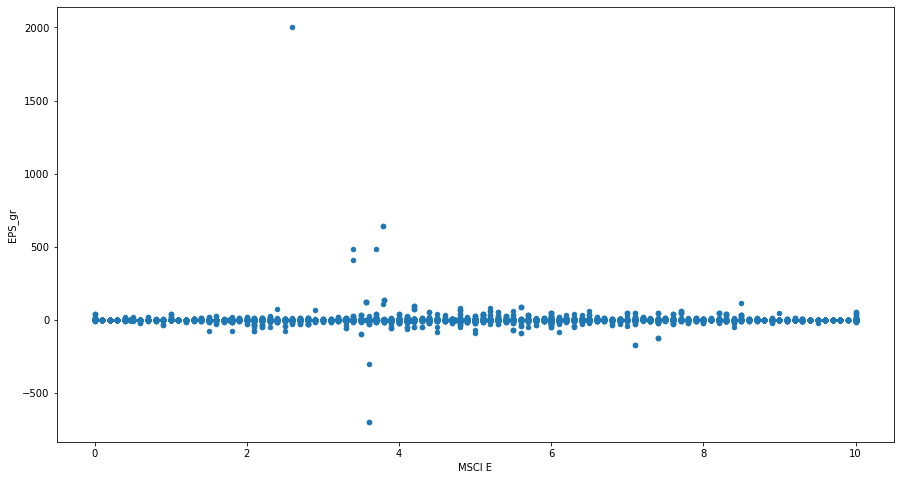

In [29]:
df_yr.plot(kind = 'scatter', x = "MSCI E", y = "EPS_gr", figsize = (15,8)) # 극값 처리 필요 # 표준화&단위조정 필요

In [30]:
df_z = df

df_z['MSCI E mean'] = df_z.groupby(['Periods'])['MSCI E'].transform('mean')
df_z['MSCI E std'] = df_z.groupby(['Periods'])['MSCI E'].transform('std')
df_z['MSCI E z'] = (df_z['MSCI E'] - df_z['MSCI E mean']) / df_z['MSCI E std']
df_z['MSCI E z pct'] = df_z.groupby(['Periods'])['MSCI E z'].rank(ascending=False, pct=True)

df_z['EPS_gr mean'] = df_z.groupby(['Periods'])['EPS_gr'].transform('mean')
df_z['EPS_gr std'] = df_z.groupby(['Periods'])['EPS_gr'].transform('std')
df_z['EPS_gr z'] = (df_z['EPS_gr'] - df_z['EPS_gr mean']) / df_z['EPS_gr std']
df_z['EPS_gr z pct'] = df_z.groupby(['Periods'])['EPS_gr z'].rank(ascending=False, pct=True)

df_z

C:\Users\jchoi02\AppData\Local\Temp/ipykernel_20100/1787884795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z['MSCI E mean'] = df_z.groupby(['Periods'])['MSCI E'].transform('mean')
C:\Users\jchoi02\AppData\Local\Temp/ipykernel_20100/1787884795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z['MSCI E std'] = df_z.groupby(['Periods'])['MSCI E'].transform('std')
C:\Users\jchoi02\AppData\Local\Temp/ipykernel_20100/1787884795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,Unnamed: 0,Company Name,Periods,Ticker,Region,Country,Sector,Industry,MSCI Rating,MSCI E,...,EPS_gr,yyyy,MSCI E mean,MSCI E std,MSCI E z,MSCI E z pct,EPS_gr mean,EPS_gr std,EPS_gr z,EPS_gr z pct
93,698833,Yuhan Corporation,2013-01-31,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,...,2.799278,2013,4.878980,2.256634,-1.453040,0.919860,0.290472,25.436053,0.098632,0.056665
94,698833,Yuhan Corporation,2013-02-28,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,...,2.799278,2013,4.911763,2.265485,-1.461834,0.923421,0.285984,25.120239,0.100051,0.055789
95,698833,Yuhan Corporation,2013-03-29,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,...,1.164163,2013,4.931939,2.298702,-1.449487,0.921755,1.001058,47.286095,0.003449,0.147768
96,698833,Yuhan Corporation,2013-04-30,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,...,-0.067406,2013,4.955921,2.342975,-1.432333,0.920472,-0.068518,7.335612,0.000152,0.564476
97,698833,Yuhan Corporation,2013-05-31,000100-KR,Asia/Pacific Ex Japan,Korea,Health Care,Pharmaceuticals,BBB,1.6,...,-0.067406,2013,4.987099,2.357172,-1.436933,0.922345,-0.034491,7.257733,-0.004535,0.562124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444896,598381,Zurich Insurance Group Ltd,2018-12-31,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,7.0,...,0.161318,2018,5.528779,2.258994,0.651273,0.240990,0.989459,31.139013,-0.026595,0.521786
444897,598381,Zurich Insurance Group Ltd,2019-01-31,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,7.0,...,0.161318,2019,5.535329,2.256967,0.648955,0.242179,0.968356,31.139492,-0.025917,0.520496
444898,598381,Zurich Insurance Group Ltd,2019-02-28,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,7.0,...,0.161318,2019,5.496245,2.272245,0.661793,0.238466,0.970732,31.055105,-0.026064,0.521996
444899,598381,Zurich Insurance Group Ltd,2019-03-29,ZURN-CH,Europe,Switzerland,Financials,Insurance,AA,7.0,...,0.619254,2019,5.421274,2.317099,0.681337,0.233531,-0.203571,26.423272,0.031140,0.313175


<AxesSubplot:xlabel='MSCI E z', ylabel='EPS_gr z'>

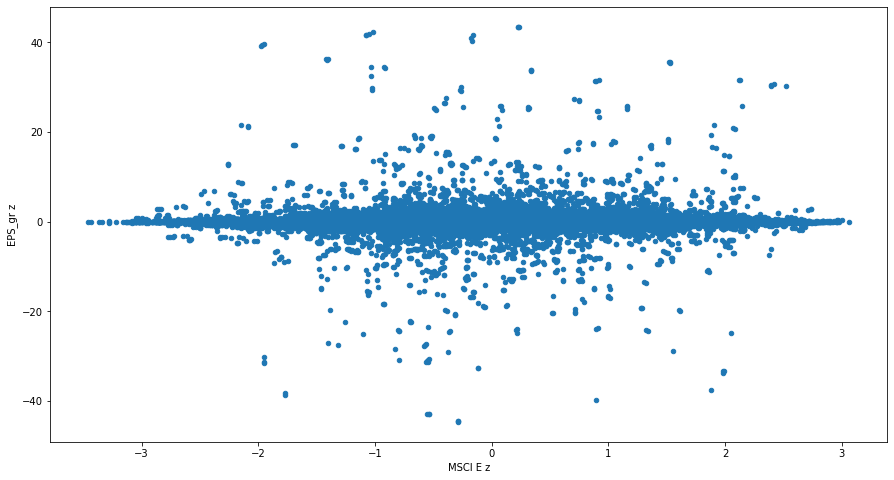

In [31]:
df_z.plot(kind = 'scatter', x = "MSCI E z", y = "EPS_gr z", figsize = (15,8))

In [32]:
df.dropna().groupby(['Periods']).transform(zscore)

,MSCI E,MSCI S,MSCI G,EPS,Net Income,Asset,EPS_gr,yyyy,MSCI E mean,MSCI E std,MSCI E z,MSCI E z pct,EPS_gr mean,EPS_gr std,EPS_gr z,EPS_gr z pct
93,-1.459602,0.218300,-1.529601,0.018756,-0.375764,-0.279211,0.097945,NaN,NaN,NaN,-1.459602,1.459160,NaN,NaN,0.097945,-1.532925
94,-1.467166,0.220892,-1.511465,0.018292,-0.373588,-0.278741,0.099400,NaN,NaN,NaN,-1.467166,1.471368,NaN,NaN,0.099400,-1.536235
95,-1.455033,0.222972,-1.488391,0.021153,-0.370598,-0.276538,0.003305,NaN,NaN,NaN,-1.455033,1.465914,NaN,NaN,0.003305,-1.222047
96,-1.437463,0.223642,-1.441006,0.299934,-0.249004,-0.276198,0.000718,NaN,NaN,NaN,-1.437463,1.460881,NaN,NaN,0.000718,0.221745
97,-1.439459,0.240031,-1.438377,0.300675,-0.257823,-0.276340,-0.003968,NaN,NaN,NaN,-1.439459,1.464935,NaN,NaN,-0.003968,0.213529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444896,0.650862,1.017634,1.557792,-0.142520,0.968048,1.073946,-0.026609,NaN,NaN,NaN,0.650862,-0.897833,NaN,NaN,-0.026609,0.074572
444897,0.648542,1.015635,1.560218,-0.142739,0.971434,1.071612,-0.025931,NaN,NaN,NaN,0.648542,-0.893713,NaN,NaN,-0.025931,0.070102
444898,0.661389,1.018021,1.563163,-0.142653,0.977857,1.075165,-0.026078,NaN,NaN,NaN,0.661389,-0.906579,NaN,NaN,-0.026078,0.075303
444899,0.680943,0.998281,1.580303,-0.142523,0.995820,1.072917,0.031183,NaN,NaN,NaN,0.680943,-0.923686,NaN,NaN,0.031183,-0.648969


array([[<AxesSubplot:title={'center':'Periods'}>,
        <AxesSubplot:title={'center':'MSCI E'}>,
        <AxesSubplot:title={'center':'MSCI S'}>,
        <AxesSubplot:title={'center':'MSCI G'}>],
       [<AxesSubplot:title={'center':'EPS'}>,
        <AxesSubplot:title={'center':'Net Income'}>,
        <AxesSubplot:title={'center':'Asset'}>,
        <AxesSubplot:title={'center':'EPS_gr'}>],
       [<AxesSubplot:title={'center':'yyyy'}>,
        <AxesSubplot:title={'center':'MSCI E mean'}>,
        <AxesSubplot:title={'center':'MSCI E std'}>,
        <AxesSubplot:title={'center':'MSCI E z'}>],
       [<AxesSubplot:title={'center':'MSCI E z pct'}>,
        <AxesSubplot:title={'center':'EPS_gr mean'}>,
        <AxesSubplot:title={'center':'EPS_gr std'}>,
        <AxesSubplot:title={'center':'EPS_gr z'}>],
       [<AxesSubplot:title={'center':'EPS_gr z pct'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

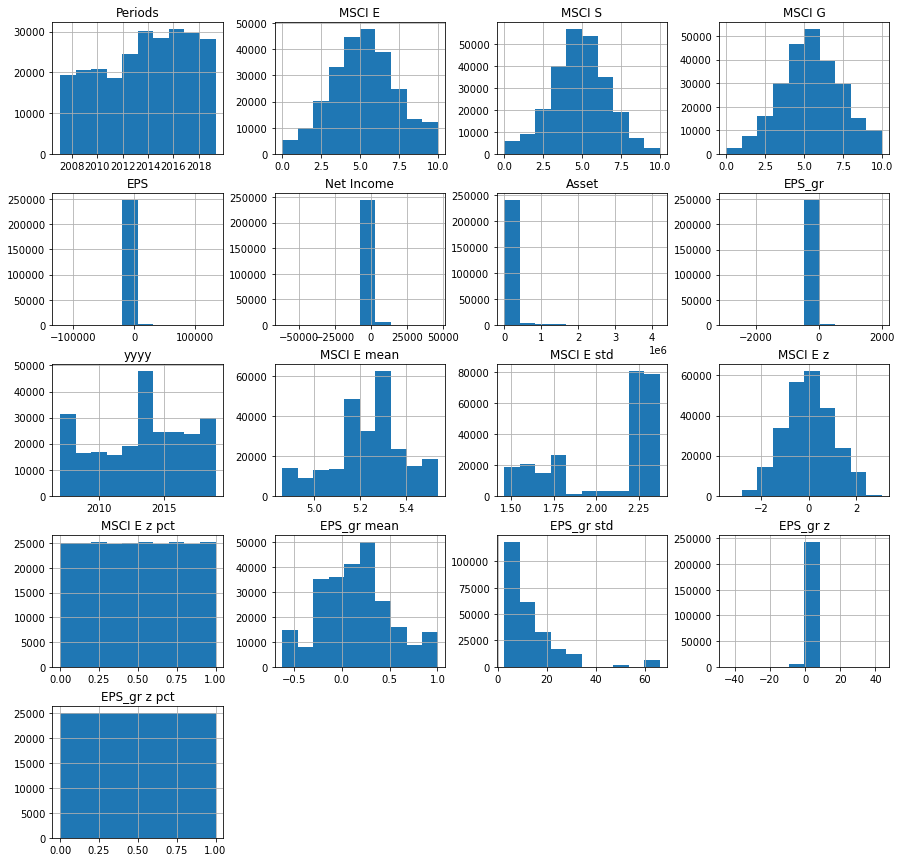

In [33]:
df.hist(figsize=(15,15))